In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [10]:
psy = pd.read_csv("Youtube01-Psy.csv")  
psy

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
...,...,...,...,...,...
345,z13th1q4yzihf1bll23qxzpjeujterydj,Carmen Racasanu,2014-11-14T13:27:52,How can this have 2 billion views when there's...,0
346,z13fcn1wfpb5e51xe04chdxakpzgchyaxzo0k,diego mogrovejo,2014-11-14T13:28:08,I don't now why I'm watching this in 2014﻿,0
347,z130zd5b3titudkoe04ccbeohojxuzppvbg,BlueYetiPlayz -Call Of Duty and More,2015-05-23T13:04:32,subscribe to me for call of duty vids and give...,1
348,z12he50arvrkivl5u04cctawgxzkjfsjcc4,Photo Editor,2015-06-05T14:14:48,hi guys please my android photo editor downloa...,1


In [11]:
psy.drop(columns=['COMMENT_ID', 'AUTHOR','DATE'], inplace = True)
psy   #spam = 1, ham(legimimate) = 0

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1
...,...,...
345,How can this have 2 billion views when there's...,0
346,I don't now why I'm watching this in 2014﻿,0
347,subscribe to me for call of duty vids and give...,1
348,hi guys please my android photo editor downloa...,1


In [12]:
psy.isna().any()

CONTENT    False
CLASS      False
dtype: bool

In [13]:
psy.drop_duplicates(inplace = True)
psy.duplicated().sum()

0

In [14]:
psy[psy['CLASS']== 1].count()

CONTENT    175
CLASS      175
dtype: int64

In [15]:
# ham
psy[psy['CLASS'] == 0].count()

CONTENT    174
CLASS      174
dtype: int64

## Data Preprocessing

In [16]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [17]:
'''
Create a function that
- changes all the words to lower case
- tokenize the words
- remove special characters
- remove stop words and punctuation
- stemming

'''

def text_processing(CONTENT):
    text = CONTENT.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    for j in text:
        if j not in stopwords.words('english') and i not in string.punctuation:
            y.append(j)
    text = y[:]
    y.clear()

    for w in text:
     #   y.append(ps.stem(w))     incase for stemming
        y.append(w)
    return " ".join(y)

In [18]:
#Adding a new column for the processed text from the content column
psy['TEXT_PROCESSED'] = psy['CONTENT'].apply(text_processing)
psy.head(20)

,CONTENT,CLASS,TEXT_PROCESSED
0,"Huh, anyway check out this you[tube] channel: ...",1,huh anyway check tube channel kobyoshi02
1,Hey guys check out my new channel and our firs...,1,
2,just for test I have to say murdev.com,1,test say
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,shaking sexy ass channel enjoy
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1,watch check
5,"Hey, check out my new website!! This site is a...",1,hey check new website site kids stuff kidsmedi...
6,Subscribe to my channel ﻿,1,subscribe channel
7,i turned it on mute as soon is i came on i jus...,0,turned mute soon came wanted check views
8,You should check my channel for Funny VIDEOS!!﻿,1,check channel funny videos
9,and u should.d check my channel and tell me wh...,1,u check channel tell next


## Model Building
Algorithm used are
- Support Vector Classification(Linear, Polynomial, Gaussian)
- The Naive Bayes Method(Multinomial, Bernouli, Gaussian)
- Random Forest
- Decision Tree(CART)
- KNNeighbor
- Logistics Regression

In [19]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 3000 )
X = tfidf.fit_transform(psy['TEXT_PROCESSED']).toarray()
y = psy['CLASS'].values
#X.shape
#X = CountVectorizer(analyzer=text_processing).fit_transform(psy['CONTENT'])
#bag_of_words.shape
X.shape


(349, 954)

In [20]:
'''
splitting the data into training and testing set 
importing the necessary library for the Supervised Techniques and checking the accuracy/validity of the model
'''
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state= 0)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score, matthews_corrcoef

In [21]:
svc_Linear = SVC()
svc_Polynomial = SVC(kernel='poly')
svc_Gaussian = SVC(kernel='rbf')
knc = KNeighborsClassifier(n_neighbors=3)
dtc = DecisionTreeClassifier()
lrc = LogisticRegression(solver='liblinear')
rfc = RandomForestClassifier(n_estimators=80)
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [22]:
clfs = {
    'SVM_Linear' : svc_Linear,
    'SVM_Polynomial' : svc_Polynomial,
    'SVM_Gaussian' : svc_Gaussian,
    'KNNeighbor' : knc, 
    'CART': dtc, 
    'LogisticsRegression': lrc, 
    'RandomForest': rfc, 
    'GaussianNB': gnb,
    'MultinomialNB': mnb,
    'BernoulliNB':bnb
}

In [23]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    f_score = f1_score(y_test, y_pred)
    con_matrices =confusion_matrix(y_test,y_pred)
    return accuracy,precision,f_score,con_matrices

## Model Performance(UnOptimized)
- Matthew correlation Coefficient
- Accuracy
- Precision
- F_score
- Confusion Matrix

In [24]:
'''
   Using the Matthews correlation coefficient
'''

mcc_scores = []
for name, clf in clfs.items():
    clf.fit(X_train,y_train)
    current_mcc = matthews_corrcoef(y_test,clf.predict(X_test))
   
    print("==================")
    print(name)
    print(current_mcc)
    mcc_scores.append(current_mcc)


'''
    Checking the Accuracy, Precision, F-score and the confusion Matrix
'''

accuracy_scores = []
precision_scores = []
f1_scores = []
confusion_matrices = []
for name,clf in clfs.items():
    
    current_accuracy,current_precision,current_f1_score, confusion_matrice = train_classifier(clf, X_train,y_train,X_test,y_test)
    print('--------------------------------')
    print(name)
    print("Accuracy ",current_accuracy)
    print("Precision - ",current_precision)
    print("f1_scores" , current_f1_score) 
    print('Confusion Matrix\n ',confusion_matrice)  
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    f1_scores.append(current_f1_score)
    confusion_matrices.append(confusion_matrice)

    print('--------------------------------')

SVM_Linear
0.8654039287106533
SVM_Polynomial
0.7198247596504007
SVM_Gaussian
0.8654039287106533
KNNeighbor
0.4680458707431094
CART
0.7431605356175383
LogisticsRegression
0.8598601560348856
RandomForest
0.8598601560348856
GaussianNB
0.6296872653180903
MultinomialNB
0.8918080720799183
BernoulliNB
0.9174033787140845
--------------------------------
SVM_Linear
Accuracy  0.9285714285714286
Precision -  1.0
f1_scores 0.9206349206349206
Confusion Matrix
  [[36  0]
 [ 5 29]]
--------------------------------
--------------------------------
SVM_Polynomial
Accuracy  0.8428571428571429
Precision -  1.0
f1_scores 0.8070175438596492
Confusion Matrix
  [[36  0]
 [11 23]]
--------------------------------
--------------------------------
SVM_Gaussian
Accuracy  0.9285714285714286
Precision -  1.0
f1_scores 0.9206349206349206
Confusion Matrix
  [[36  0]
 [ 5 29]]
--------------------------------
--------------------------------
KNNeighbor
Accuracy  0.6857142857142857
Precision -  1.0
f1_scores 0.5217391

In [25]:
'''
    Arranging the performance based on the Matthew correlation coefficient in descending order for each Algorithm
'''
performance_psy = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores, 'F_scores':f1_scores, 'MCC_scores': mcc_scores}).sort_values('MCC_scores', ascending=False)
performance_psy

,Algorithm,Accuracy,Precision,F_scores,MCC_scores
9,BernoulliNB,0.957143,1.000000,0.953846,0.917403
8,MultinomialNB,0.942857,0.894737,0.944444,0.891808
0,SVM_Linear,0.928571,1.000000,0.920635,0.865404
2,SVM_Gaussian,0.928571,1.000000,0.920635,0.865404
5,LogisticsRegression,0.928571,0.967742,0.923077,0.859860
6,RandomForest,0.928571,0.967742,0.923077,0.859860
4,CART,0.871429,0.857143,0.869565,0.743161
1,SVM_Polynomial,0.842857,1.000000,0.807018,0.719825
7,GaussianNB,0.814286,0.838710,0.800000,0.629687
3,KNNeighbor,0.685714,1.000000,0.521739,0.468046


<AxesSubplot:xlabel='Algorithm'>

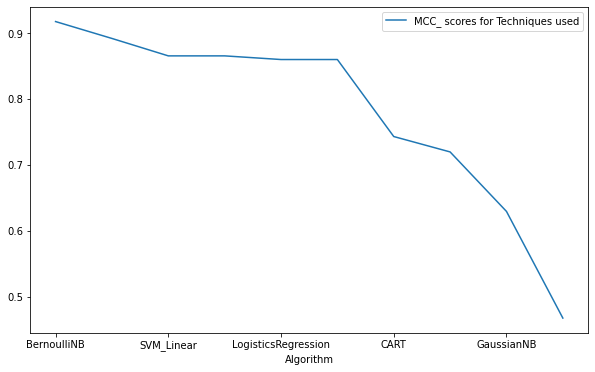

In [26]:
performance_psy.plot(x='Algorithm', y='MCC_scores', label='MCC_ scores for Techniques used', figsize = [10,6] )

## TUNING RESULT USING GRID SEARCH  

In [27]:
'''
    Tuning the support vectors for Linear, Polynomial and Gaussian to give the optimal parameter
'''
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
param_grid = [
    {
        'C':[0.5,1,10,100,0.1,0.01],
        'gamma':['scale',1, 0.1, 0.01, 0.001, 0.0001],
        'kernel':['rbf'] # ['rbf','poly','linear']
    }
]
optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=10,
    scoring='accuracy',
    verbose=0
)
C,g,k = optimal_params.fit(X_train, y_train).best_params_.values()
print(f"-----------")
print(f"C = {C}")
print(f"gamma = {g}")
print(f"kernel = {k}")


-----------
C = 100
gamma = 0.01
kernel = rbf


In [28]:

'''
    Tuning the Naive Bayes method for Bernoulli, Multinomial and Gaussian to give the optimal parameter
'''

param_grid_nb = {
        'var_smoothing': np.logspace(0, -9, num = 100)
    }

optimal_params = GridSearchCV(estimator = GaussianNB(),param_grid= param_grid_nb,
    cv=10,
    scoring='accuracy',
    verbose=1
) # [multinomialNB, GaussianNB, BernouliNB]
optimal_params.fit(X_train, y_train)
print(optimal_params.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.15199110829529336)


In [29]:

'''
    Tuning the Naive Bayes method for KNNeigbor
'''

param_grid_knn = {
        'n_neighbors': [1,3,5,7,9]
    }

optimal_params = GridSearchCV(estimator = KNeighborsClassifier(),param_grid= param_grid_knn,
    cv=10,
    scoring='accuracy',
    verbose=0
) 
optimal_params.fit(X_train, y_train)
print(optimal_params.best_estimator_)


KNeighborsClassifier(n_neighbors=3)


In [30]:
'''
    Tuning the RandomForest 
'''

param_grid_rfc = {
        'n_estimators': [20,40,60,80,100]
    }

optimal_params = GridSearchCV(estimator = RandomForestClassifier(),param_grid= param_grid_rfc,
    cv=10,
    scoring='accuracy',
    verbose=0
) 
optimal_params.fit(X_train, y_train)
print(optimal_params.best_estimator_)



RandomForestClassifier(n_estimators=40)


In [31]:
'''
    Tuning the RandomForest 
'''
param_grid_lrc = [
{
        'C': [10, 15,20,30],
     }

]

optimal_params = GridSearchCV(estimator = LogisticRegression(),param_grid= param_grid_lrc,
    cv=10,
    scoring='accuracy',
    verbose=0
) 
optimal_params.fit(X_train, y_train)
print(optimal_params.best_estimator_)


LogisticRegression(C=10)


In [32]:
'''
    Tuning the Decision Tree (CART) 
'''
param_grid_dtc = [
{
        'criterion': ["gini"],
        'random_state':[None, 1,2,4,8,10]
     }

]

optimal_params = GridSearchCV(estimator = DecisionTreeClassifier(),param_grid= param_grid_dtc,
    cv= 10,
    scoring ='accuracy',
    verbose=0
) 
optimal_params.fit(X_train, y_train)
print(optimal_params.best_estimator_)

DecisionTreeClassifier(random_state=2)


## OPTIMIZED MODEL(Performance)

             Algorithm  Accuracy  Precision  F_scores  MCC_scores
9          BernoulliNB  0.957143   1.000000  0.953846    0.917403
8        MultinomialNB  0.942857   0.894737  0.944444    0.891808
0           SVM_Linear  0.928571   1.000000  0.920635    0.865404
2         SVM_Gaussian  0.928571   1.000000  0.920635    0.865404
5  LogisticsRegression  0.928571   0.967742  0.923077    0.859860
6         RandomForest  0.928571   0.967742  0.923077    0.859860
4                 CART  0.871429   0.857143  0.869565    0.743161
1       SVM_Polynomial  0.842857   1.000000  0.807018    0.719825
7           GaussianNB  0.814286   0.838710  0.800000    0.629687
3           KNNeighbor  0.685714   1.000000  0.521739    0.468046


<AxesSubplot:xlabel='Algorithm'>

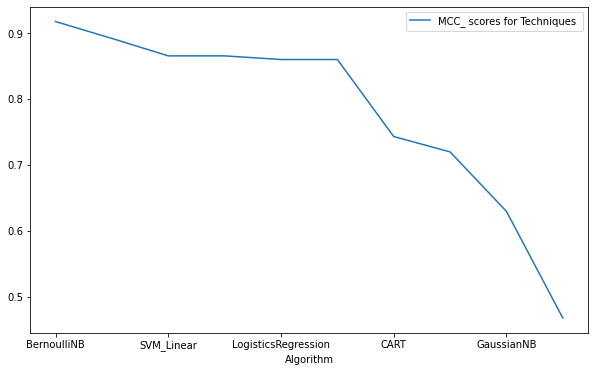

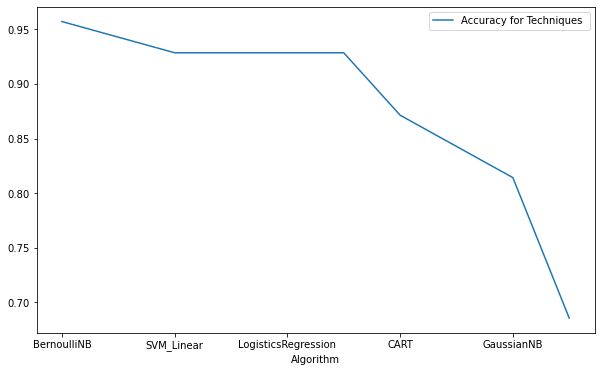

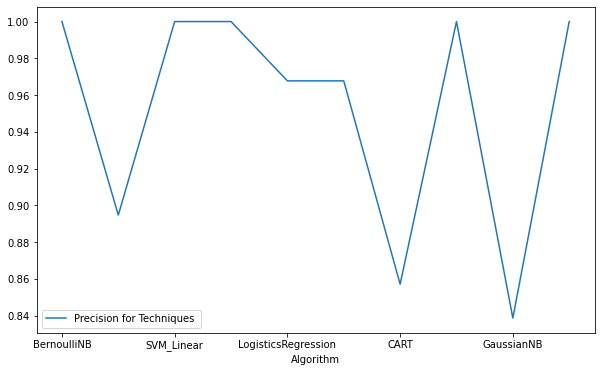

In [33]:
svc_Linear = SVC(kernel='linear', C=1, gamma = "scale")
svc_Polynomial = SVC(kernel='poly', C= 1, gamma = "scale")
svc_Gaussian = SVC(kernel='rbf',C = 10, gamma= 0.1)
knc = KNeighborsClassifier(n_neighbors=1, algorithm= "auto")
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(random_state=2)
lrc = LogisticRegression(solver='liblinear', penalty='l1', C = 10)
rfc = RandomForestClassifier(n_estimators=20, random_state=10)
gnb = GaussianNB( var_smoothing=0.15199110829529336)
bnb = BernoulliNB()

clfs = {
    'SVM_Linear' : svc_Linear,
    'SVM_Polynomial' : svc_Polynomial,
    'SVM_Gaussian' : svc_Gaussian,
    'KNNeighbor' : knc, 
    'CART': dtc, 
    'LogisticsRegression': lrc, 
    'RandomForest': rfc, 
    'GaussianNB': gnb,
    'MultinomialNB': mnb,
    'BernoulliNB':bnb
}

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    f_score = f1_score(y_test, y_pred)
    con_matrices =confusion_matrix(y_test,y_pred)
    return accuracy,precision,f_score,con_matrices

'''
    Arranging the performance based on the Matthew correlation coefficient in descending order for each Algorithm
'''
performance_psy = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores, 'F_scores':f1_scores, 'MCC_scores': mcc_scores}).sort_values('MCC_scores', ascending=False)
print(performance_psy)

performance_psy.plot(x='Algorithm', y='MCC_scores', label='MCC_ scores for Techniques ', figsize = [10,6] )

performance_psy.plot(x='Algorithm', y='Accuracy', label='Accuracy for Techniques ', figsize = [10,6] )

performance_psy.plot(x='Algorithm', y='Precision', label='Precision for Techniques ', figsize = [10,6] )

<AxesSubplot:>

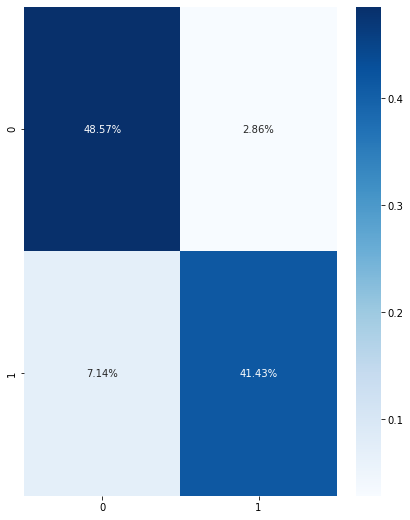

In [34]:
import seaborn as sns
'''
    A Heatmap confusion matrix for the predicted outcome for Linear support Vector Algorithms
'''
lrc.fit(X_train,y_train)
y_pred_lrc = lrc.predict(X_test)
cm = confusion_matrix(y_test,y_pred_lrc)
plt.figure(figsize=(7,9))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')


<AxesSubplot:>

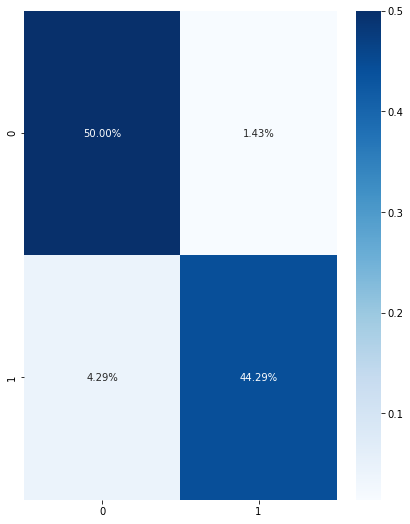

In [35]:
svc_Linear.fit(X_train,y_train)
y_pred_svc_Linear = svc_Linear.predict(X_test)
cm = confusion_matrix(y_test,y_pred_svc_Linear)
plt.figure(figsize=(7,9))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

<AxesSubplot:>

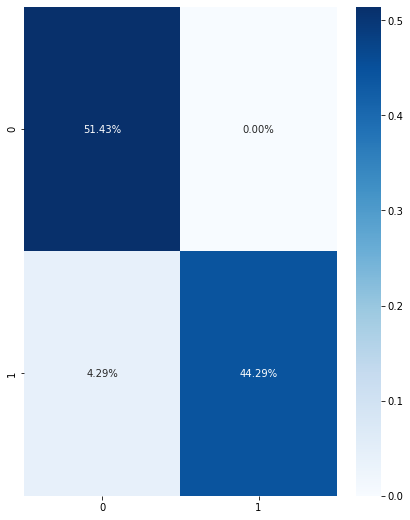

In [36]:

bnb.fit(X_train,y_train)
y_pred_bnb = bnb.predict(X_test)
cm = confusion_matrix(y_test,y_pred_bnb)
plt.figure(figsize=(7,9))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

In [ ]:

lrc.fit(X_train,y_train)
y_pred_lrc = lrc.predict(X_test)
cm = confusion_matrix(y_test,y_pred_lrc)
plt.figure(figsize=(7,9))
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')